# Pymaceuticals Inc.


## Observations or inferences that can be made from the data

1. Between four Regimens, Capomulin and Ramicane works better in reducing the tummor.
The size of the tummor is significat lowe based on the boxplot graphic.

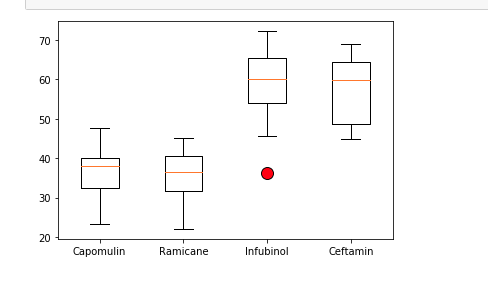



2. The sex of the mouse doesnt define the size of the tummor. Based in the pie chat, we have almost the same amout of male and femal mice.

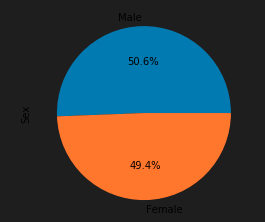



3. The Weight of the Mouse is proportional to the size of the tumor.
The more heavy a mouse is the more chances the tumor is bigger.

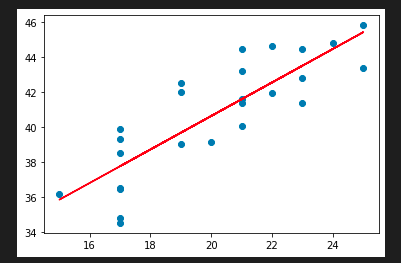

---



## Analysis Data Clening

There was one Mouse with ID G989 that had duplicated data for the Timepoint 0, 5, 10, 15, 20.
We had three possible options with those duplicated values: 
* Take the first duplicated value 
* Take the last duplicated value
* Complete delete the mouse for the test

It was decided to take the first value of the duplicated as decision of the Analyst because the first value indicated more stable results during the process. 

After reading the Instructions from the assigment in BootCamp Spot Vs The steps in comments in this file, I realized I have to "Create a clean DataFrame by dropping the duplicate mouse by its ID." That means I have to delete the mouse.

In summary I have created the following files *(Inside Data folder)*:
* Combined_data: It is the merged of the original two files (mouse_metadata and Study_metadata). Including duplicates. 249 Unique Mouse list.
* Combined_data_unique: It is the Combine Data deleting the duplicated values (leaving the first ocurrence).
* Combine_data_drop_dup_mouse: It is the Combined data dropping ALL values (rows) for the mouse that had duplicated Timepoints. 248 Unique Mouse List.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata,study_results,how='outer')
print(combined_data.head())

combined_data.to_csv("data/Combined_data.csv",index=False)

# Display the data table for preview


  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  


In [2]:
# Checking the number of mice.
# As per instructions: "Display the number of unique mice IDs in the data"
print("\nThe following is the list of "+str(len(combined_data['Mouse ID'].unique()))+" Unique Mouse Ids:\n")
print(combined_data['Mouse ID'].unique())


The following is the list of 249 Unique Mouse Ids:

['k403' 's185' 'x401' 'm601' 'g791' 's508' 'f966' 'm546' 'z578' 'j913'
 'u364' 'n364' 'y793' 'r554' 'm957' 'c758' 't565' 'a644' 'i177' 'j989'
 'i738' 'a520' 'w914' 'r811' 'g288' 'i334' 'q610' 'd251' 'l897' 'c458'
 'b742' 'b128' 'j246' 'a411' 'j119' 'w150' 'v923' 'g316' 's710' 'l509'
 'r944' 'e662' 'u196' 'q597' 'a444' 'i557' 'r921' 'w678' 'y449' 'a203'
 'a251' 'a262' 'a275' 'a366' 'a401' 'a457' 'a492' 'a577' 'a685' 'a699'
 'a788' 'a818' 'a897' 'a963' 'b313' 'b447' 'b487' 'b559' 'b759' 'b879'
 'c139' 'c264' 'c282' 'c302' 'c326' 'c402' 'c559' 'c580' 'c757' 'c766'
 'c819' 'c832' 'c895' 'c927' 'd133' 'd164' 'd474' 'e213' 'e227' 'e291'
 'e476' 'e584' 'f129' 'f234' 'f278' 'f345' 'f394' 'f436' 'f545' 'f932'
 'f993' 'g107' 'g296' 'g497' 'g558' 'g570' 'g867' 'g989' 'h246' 'h333'
 'h428' 'h531' 'i386' 'i477' 'i635' 'i669' 'i901' 'j235' 'j296' 'j365'
 'j755' 'j984' 'k210' 'k382' 'k483' 'k510' 'k603' 'k754' 'k804' 'k862'
 'k894' 'l215' 'l264' 'l

In [3]:

# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# "Check for any mouse ID with duplicate time points. Display the data associated with that mouse ID"

#create a column where I combine the Mouse ID and the Timepoint to find when one mouse have duplicated Timepoints.
combined_data['id_time']=(combined_data['Mouse ID'].astype(str)+"-"+combined_data['Timepoint'].astype(str))

#Find the duplicates from the column I just created
combine_data_duplicated = combined_data[combined_data['id_time'].duplicated() == True]

print("\n\nThe following "+str(len(combine_data_duplicated))+" rows has duplicated combination of Mouse ID and Timepoint: ")
combine_data_duplicated





The following 5 rows has duplicated combination of Mouse ID and Timepoint: 


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,id_time
909,g989,Propriva,Female,21,26,0,45.000000,0,g989-0
911,g989,Propriva,Female,21,26,5,47.570392,0,g989-5
913,g989,Propriva,Female,21,26,10,49.880528,0,g989-10
915,g989,Propriva,Female,21,26,15,53.442020,0,g989-15
917,g989,Propriva,Female,21,26,20,54.657650,1,g989-20


In [4]:
# Create a new DataFrame where this data is removed

combined_data_unique = combined_data.drop_duplicates(subset='id_time',keep='first')
del combined_data_unique['id_time']

# Write the information in a file in case is needed after
combined_data_unique.to_csv("data/Combined_data_unique.csv",index=False)
print("DataFrame with Unique Mice and Timepoint:")
combined_data_unique


DataFrame with Unique Mice and Timepoint:


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Optional: Get ALL the data for the duplicate mouse ID. 
data_from_duplicated_mouse = combined_data.query("`Mouse ID` == 'g989'")
del data_from_duplicated_mouse['id_time']
print(data_from_duplicated_mouse)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26       

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

combine_data_drop_dup_mouse = combined_data.query("`Mouse ID` != 'g989' ")
combine_data_drop_dup_mouse.to_csv("data/Combine_data_drop_dup_mouse.csv",index=False)

In [7]:
# Checking the number of mice in the clean DataFrame.


print("\nThe following is the list of "+str(len(combine_data_drop_dup_mouse['Mouse ID'].unique()))+" unique Mouse Ids\n after droping the Mouse that had duplicate values in the Timepoint:")
print(combine_data_drop_dup_mouse['Mouse ID'].unique())


The following is the list of 248 unique Mouse Ids
 after droping the Mouse that had duplicate values in the Timepoint:
['k403' 's185' 'x401' 'm601' 'g791' 's508' 'f966' 'm546' 'z578' 'j913'
 'u364' 'n364' 'y793' 'r554' 'm957' 'c758' 't565' 'a644' 'i177' 'j989'
 'i738' 'a520' 'w914' 'r811' 'g288' 'i334' 'q610' 'd251' 'l897' 'c458'
 'b742' 'b128' 'j246' 'a411' 'j119' 'w150' 'v923' 'g316' 's710' 'l509'
 'r944' 'e662' 'u196' 'q597' 'a444' 'i557' 'r921' 'w678' 'y449' 'a203'
 'a251' 'a262' 'a275' 'a366' 'a401' 'a457' 'a492' 'a577' 'a685' 'a699'
 'a788' 'a818' 'a897' 'a963' 'b313' 'b447' 'b487' 'b559' 'b759' 'b879'
 'c139' 'c264' 'c282' 'c302' 'c326' 'c402' 'c559' 'c580' 'c757' 'c766'
 'c819' 'c832' 'c895' 'c927' 'd133' 'd164' 'd474' 'e213' 'e227' 'e291'
 'e476' 'e584' 'f129' 'f234' 'f278' 'f345' 'f394' 'f436' 'f545' 'f932'
 'f993' 'g107' 'g296' 'g497' 'g558' 'g570' 'g867' 'h246' 'h333' 'h428'
 'h531' 'i386' 'i477' 'i635' 'i669' 'i901' 'j235' 'j296' 'j365' 'j755'
 'j984' 'k210' 'k382' 'k483'

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.



#creating Data Frame for the mean, median, variance, standard deviation, and SEM

#finding the mean, median, variance, standard deviation, and SEM of the tummor for each regimen

res_mean=combine_data_drop_dup_mouse.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
#print(res_mean)
res_median=combine_data_drop_dup_mouse.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
#print(res_median)
res_var=combine_data_drop_dup_mouse.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
#print(res_var)
res_std=combine_data_drop_dup_mouse.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
#print(res_std)
res_sem=combine_data_drop_dup_mouse.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
#print(res_sem)


combine_data_drop_dup_mouse_stats_tumor = pd.DataFrame({"MEAN" : res_mean,
                                                       "MEDIAN" : res_median,
                                                       "VARIANCE" : res_var,
                                                       "Std Variation" : res_std,
                                                       "SEM" : res_sem })                                                       


combine_data_drop_dup_mouse_stats_tumor



,MEAN,MEDIAN,VARIANCE,Std Variation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

#copying the dataframe to have the original data in case of needed later
combine_data_drop_dup_mouse_stats_tumor2 = pd.DataFrame(combine_data_drop_dup_mouse[['Drug Regimen','Tumor Volume (mm3)']])

print("Dataframe of Stats NOT using aggregate:")
print(combine_data_drop_dup_mouse_stats_tumor)


print("\nDataframe of Stats Using aggregate:")
# Using the aggregation method, produce the same summary statistics in a single line.
combine_data_drop_dup_mouse_stats_tumor2.groupby('Drug Regimen')['Tumor Volume (mm3)'].aggregate(['mean','median','var','std','sem'])



Dataframe of Stats NOT using aggregate:
                   MEAN     MEDIAN   VARIANCE  Std Variation       SEM
Drug Regimen                                                          
Capomulin     40.675741  41.557809  24.947764       4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177       6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684       6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577       8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479       8.134708  0.596466
Placebo       54.033581  52.288934  61.168083       7.821003  0.581331
Propriva      52.320930  50.446266  43.852013       6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704       4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562       7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355       6.966589  0.516398

Dataframe of Stats Using aggregate:


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Personal Bonus 1: ###

Another way to do tghe same stats by Agregation (using dictionaries)

In [10]:
#copying the dataframe to have the original data in case of needed later
combine_data_drop_dup_mouse_stats_tumor4 = pd.DataFrame(combine_data_drop_dup_mouse[['Drug Regimen','Tumor Volume (mm3)']])

#finding the mean, median, variance, standard deviation, and SEM of the tummor for each regimen
combine_data_drop_dup_mouse_stats_tumor4 = combine_data_drop_dup_mouse_stats_tumor4.groupby(['Drug Regimen'],as_index=False).agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})
combine_data_drop_dup_mouse_stats_tumor4

Drug Regimen Tumor Volume (mm3)                                          
                             mean     median        var       std       sem
0    Capomulin          40.675741  41.557809  24.947764  4.994774  0.329346
1     Ceftamin          52.591172  51.776157  39.290177  6.268188  0.469821
2    Infubinol          52.884795  51.820584  43.128684  6.567243  0.492236
3     Ketapril          55.235638  53.698743  68.553577  8.279709  0.603860
4     Naftisol          54.331565  52.509285  66.173479  8.134708  0.596466
5      Placebo          54.033581  52.288934  61.168083  7.821003  0.581331
6     Propriva          52.320930  50.446266  43.852013  6.622085  0.544332
7     Ramicane          40.216745  40.673236  23.486704  4.846308  0.320955
8     Stelasyn          54.233149  52.431737  59.450562  7.710419  0.573111
9    Zoniferol          53.236507  51.818479  48.533355  6.966589  0.516398

### PERSONAL BONUS 2: ###

Using describe to compate the data with the above

In [11]:



print("\nDataframe of Stats USING Describe:")
print(combine_data_drop_dup_mouse_stats_tumor)

#copying the dataframe to have the original data in case of needed later
combine_data_drop_dup_mouse_stats_tumor3 = pd.DataFrame(combine_data_drop_dup_mouse[['Drug Regimen','Tumor Volume (mm3)']])
print(combine_data_drop_dup_mouse_stats_tumor3.groupby('Drug Regimen')['Tumor Volume (mm3)'].describe())




Dataframe of Stats USING Describe:
                   MEAN     MEDIAN   VARIANCE  Std Variation       SEM
Drug Regimen                                                          
Capomulin     40.675741  41.557809  24.947764       4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177       6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684       6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577       8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479       8.134708  0.596466
Placebo       54.033581  52.288934  61.168083       7.821003  0.581331
Propriva      52.320930  50.446266  43.852013       6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704       4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562       7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355       6.966589  0.516398
              count       mean       std        min        25%        50%  \
Drug Regimen                       

## Bar and Pie Charts

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64


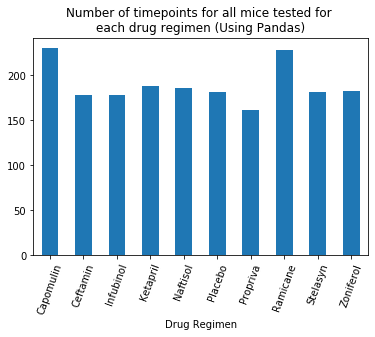

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

timepoints_plot = combined_data[["Drug Regimen", "Timepoint"]]

timepoints_plot_groupped = timepoints_plot.groupby("Drug Regimen")['Timepoint'].count()
print(timepoints_plot_groupped)

timepoints_plot_groupped.plot.bar (x="Drug Regimen", y="Timepoint", rot=70, title="Number of timepoints for all mice tested for \neach drug regimen (Using Pandas)")
plt.show()



([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

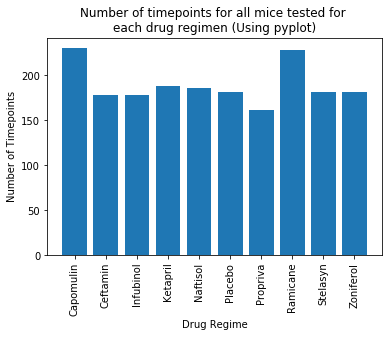

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.



# Set x axis Y axis labels and Tittle


# x_axis = np.arange(len(timepoints_plot_groupped))




x_axis = timepoints_plot_groupped.index
y_axis = timepoints_plot_groupped.values



plt.bar(x_axis,y_axis)
plt.title('Number of timepoints for all mice tested for \neach drug regimen (Using pyplot)')
plt.xlabel('Drug Regime')
plt.ylabel('Number of Timepoints')
plt.xticks(rotation=90)






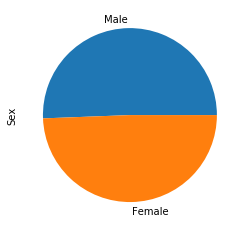

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas


# sex_plot = combined_data.groupby("Sex")["Mouse ID"].count().reset_index(name="Count")
# sex_plot


counts=combined_data.Sex.value_counts()
counts.plot(kind="pie",)




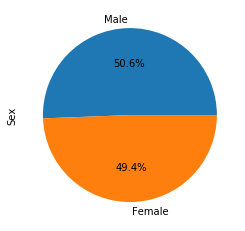

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

counts=combined_data.Sex.value_counts()
plt.pie(counts.values,labels=counts.index.values,autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show()



## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
max_tummor=combined_data.groupby(['Mouse ID'])['Timepoint'].max()
max_tummor=max_tummor.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
mergedata=max_tummor.merge(combined_data,on=['Mouse ID','Timepoint'],how='left')
mergedata

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites,id_time
0,a203,45,Infubinol,Female,20,23,67.973419,2,a203-45
1,a251,45,Infubinol,Female,21,25,65.525743,1,a251-45
2,a262,45,Placebo,Female,17,29,70.717621,4,a262-45
3,a275,45,Ceftamin,Female,20,28,62.999356,3,a275-45
4,a366,30,Stelasyn,Female,16,29,63.440686,1,a366-30
...,...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0,z435-10
245,z578,45,Ramicane,Male,11,16,30.638696,0,z578-45
246,z581,45,Infubinol,Female,24,25,62.754451,3,z581-45
247,z795,45,Naftisol,Female,13,29,65.741070,3,z795-45


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
list=['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_list=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for drug in list: 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol=mergedata.loc[mergedata['Drug Regimen']==drug,"Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_list.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    outliers=final_tumor_vol.loc[(final_tumor_vol < lower_bound)|(final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}" )

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


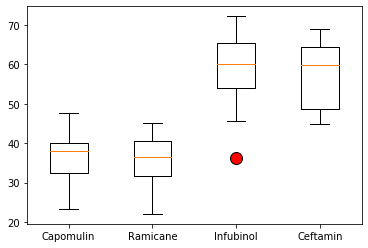

In [18]:
# Generate a   that shows the distrubution of the tumor volume for each treatment group.

linecolor=dict(markerfacecolor='red',markersize=12)
plt.boxplot(tumor_vol_list,labels=list,flierprops=linecolor)
plt.ylabel=("Tumor Volume (mm3)")
plt.show()


## Line and Scatter Plots

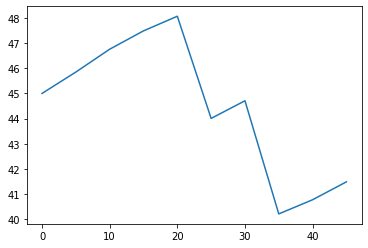

In [19]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

table=combined_data.loc[combined_data["Drug Regimen"]=="Capomulin"]
data=table.loc[table["Mouse ID"]=='l509']

plt.xlabel=("Timepoint")
plt.ylabel=("Tumor Volume (mm3)")

plt.plot(data["Timepoint"],data["Tumor Volume (mm3)"])



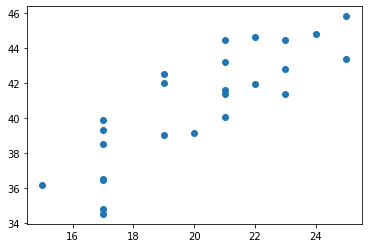

In [20]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

table=combined_data.loc[combined_data["Drug Regimen"]=="Capomulin"]
average=table.groupby(["Mouse ID"]).mean()

plt.xlabel=("Weight (g)")
plt.ylabel=("Average Tummor")

plt.scatter(average["Weight (g)"],average["Tumor Volume (mm3)"])


## Correlation and Regression

0.84


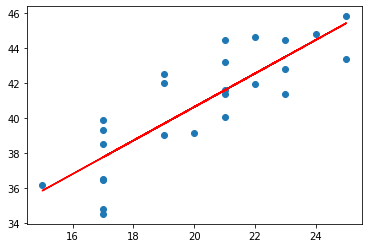

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


x_values = average["Weight (g)"]
y_values = average["Tumor Volume (mm3)"]
corr=round(st.pearsonr(x_values,y_values)[0],2)
print(corr)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.xlabel=("Weight (g)")
plt.ylabel=("Average Tummor")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
